# Lecture 5

In [1]:
%run set_env.py
%matplotlib inline

Check versions:
  numpy version     :'2.0.2'
  matplotlib version:'3.9.4'


## Universal Functions (UFuncs)

A <font color="green"><b>universal function (ufunc)</b></font> is:
* a function which operates on an ndarray object in an <font color="green"><b>element-by-element</b></font> fashion
* an instance of the numpy.ufunc class
* a function of which many are implemented in compiled C code
* to which broadcasting rules are applied. 

The concept is similar to the <a href="https://docs.python.org/3/library/functions.html#map">map function</a> in standard Python.

### Common ufuncs within NumPy 

* Math operations:
  * add(x1,x2)   (called when invoked a+b)
  * power(x1,x2) (same as '**')
  * mod(x1,x2)
  * exp(x)
  * sqrt(x)
  * log(x)  (Napierian/natural logarithm)
  * ...
* Trig operations:
  * sin(x)
  * sinh(x)
  * arcsinh(x)
  * deg2rad(x)
  * rad2deg(x)
  * ..
* Bit-twiddling operations:
  * bitwise_and(x1,x2)
  * ...
* Comparison functions:
  * greater(x1,x2) (called when x1>x2 is invoked)
  * not_equal(x1,x2) (called when x1!=x2 is invoked)
  * maximum(x1,x2)  (el.-wise max.)
  * isfinite(x)   (el. test for finiteness i.e. neither Infinity nor Not a Number)
  * isinf(x)
  * isnan(x)
  * ...
  
All available ufuncs can be found [**here**](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs).

<font color="blue"><b>Note:</b></font>
* One can write its own UFunc -> C-API

**Examples/Applications of UFuncs**

In [11]:
import math as m
import cmath as cm
print(cm.sqrt(-2.0))
x = [2.0,3.0]
y = [m.sqrt(item) for item in x]
print(y)

1.4142135623730951j
[1.4142135623730951, 1.7320508075688772]


In [12]:
# Example 1: no BC
np.set_printoptions(precision=5)
rng = rnd.default_rng()
x = rng.random((2,3,7))
y = np.exp(x)
print(f" x:\n{x}\n")
print(f" y:\n{y}\n")
import math
z=0.5
print(np.exp(z))

 x:
[[[0.00572 0.33083 0.36895 0.82606 0.48843 0.28109 0.91307]
  [0.91648 0.19578 0.57259 0.23287 0.93551 0.40173 0.25006]
  [0.69333 0.06799 0.40151 0.57508 0.34779 0.82726 0.55737]]

 [[0.5222  0.20864 0.11146 0.6315  0.51099 0.32499 0.99765]
  [0.77176 0.27362 0.52914 0.66659 0.65291 0.39176 0.09567]
  [0.3525  0.3379  0.46115 0.14885 0.61816 0.09812 0.66985]]]

 y:
[[[1.00573 1.39212 1.44621 2.28429 1.62975 1.32457 2.49195]
  [2.50046 1.21626 1.77285 1.26222 2.5485  1.49441 1.2841 ]
  [2.00036 1.07035 1.49408 1.77728 1.41593 2.28704 1.74607]]

 [[1.68572 1.232   1.11791 1.88042 1.66695 1.38401 2.71189]
  [2.16357 1.31472 1.69747 1.94758 1.92113 1.47958 1.10039]
  [1.42261 1.40201 1.58589 1.1605  1.85551 1.10309 1.95394]]]

1.6487212707001282


In [13]:
# Example 2: with Broadcasting
x=np.arange(90,103,dtype=int)
y=np.arange(2,7,dtype=int).reshape((5,1))
print(f"  x:{x.shape}\n{x}\n")
print(f"  y:{y.shape}\n{y}\n")
z=np.mod(x,y)
print(f"  z:{z.shape}\n{z}\n")

  x:(13,)
[ 90  91  92  93  94  95  96  97  98  99 100 101 102]

  y:(5, 1)
[[2]
 [3]
 [4]
 [5]
 [6]]

  z:(5, 13)
[[0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 1 2 0 1 2 0 1 2 0 1 2 0]
 [2 3 0 1 2 3 0 1 2 3 0 1 2]
 [0 1 2 3 4 0 1 2 3 4 0 1 2]
 [0 1 2 3 4 5 0 1 2 3 4 5 0]]



### Reductions on ndarrays

* Besides Numpy functions which operate on ndarrays <font color="green"><b>element-wise</b></font> (UFuncs, vide supra),<br>
  there are also Numpy functions which perform <font color="green"><b>reductions</b></font> on ndarrays. 

* By <font color="green"><b>default</b></font>, the reductions operate on the <font color="green"><b>whole</b></font> ndarray.
  
* However, we can specify a particular <font color="green"><b>axis/dimension</b></font> on which to perform the reduction.  

* The functions all have a similar syntax:<br>
  numpy.func_name(a,[axis=None],[dtype=None],[out=None])<br>
  The function <font color="green"><b>func_name</b></font> can be called in 2 different ways:
  * a.func_name()    # <font color="blue"><b>Object-Oriented way</b></font> i.e. method associated to an object
  * np.func_name(a)  # <font color="blue"><b>Procedural way</b></font> i.e. array is an argument of the function

#### Mathematical Operations
* numpy.sum(), numpy.cumsum()    : sum vs. cumulative sum
* numpy.prod(), numpy.cumprod()  : prod vs. cumulative product
* numpy.min(), numpy.max()       : min, max of a vector
* numpy.argmin(), numpy.argmax() : return indices of the min./max. values

#### Statistical Operations
* numpy.mean, numpy.median : average, median
* numpy.std, numpy.var     : standard deviation, variance

#### Logical Operations
* numpy.any(): Test whether ANY el. along a given axis evaluates to True
* numpy.all(): Test whether ALL el. along a given axis evaluate to True

### Examples

**Example 1**

In [14]:
# Invoke sum over the complete ndarray
a = np.arange(1,25).reshape((2,3,4))
print(f"  a:\n{a}\n")
print(f"  a.shape:{a.shape}\n")
print(f"  a.sum() (Object-oriented syntax): {a.sum()}\n")
print(f"  np.sum(a) (Procedural syntax)   : {np.sum(a)}\n")

  a:
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]

  a.shape:(2, 3, 4)

  a.sum() (Object-oriented syntax): 300

  np.sum(a) (Procedural syntax)   : 300



In [15]:
# Invoke sums over certain axes
a = np.arange(1,25).reshape((2,3,4))
red0 = a.sum(axis=0)
print(f"   a.sum(axis=0)   shape:{red0.shape}:\n{red0}\n")
red1 = a.sum(axis=1)
print(f"   a.sum(axis=1)   shape:{red1.shape}:\n{red1}\n")
red2 = a.sum(axis=2)
print(f"   a.sum(axis=2)   shape:{red2.shape}:\n{red2}\n")

   a.sum(axis=0)   shape:(3, 4):
[[14 16 18 20]
 [22 24 26 28]
 [30 32 34 36]]

   a.sum(axis=1)   shape:(2, 4):
[[15 18 21 24]
 [51 54 57 60]]

   a.sum(axis=2)   shape:(2, 3):
[[10 26 42]
 [58 74 90]]



**Example 2**

In [16]:
np.set_printoptions(precision=4)
rng = rnd.default_rng()
b = rng.random((3,7))
print(f"  b:\n{b}\n")
print(f"  b.shape:{b.shape}\n")

av = b.mean(axis=0)
print(f"  b.mean(axis=0):\n{av}\n")

bool_matrix = b < 0.05
print(f"  bool_matrix:\n{bool_matrix}\n")
print(f"  Are they any values < 0.01? {bool_matrix.any()}")

  b:
[[0.2201 0.4286 0.2814 0.1005 0.9462 0.1651 0.5752]
 [0.9262 0.3418 0.3154 0.6856 0.7123 0.9529 0.5098]
 [0.9295 0.8224 0.7293 0.159  0.7343 0.1484 0.1989]]

  b.shape:(3, 7)

  b.mean(axis=0):
[0.6919 0.531  0.4421 0.315  0.7976 0.4221 0.428 ]

  bool_matrix:
[[False False False False False False False]
 [False False False False False False False]
 [False False False False False False False]]

  Are they any values < 0.01? False


## Exercises

* Generate the following vector [ 1, 3, 9, 27, ... , 729] using a UFunc.
 
* Generate a 5x10 array A with random numbers $x$ $\in$ $[0,1[$.
  * What is the maximum value for all $x$ in A?
  * What is the minimum value in each column?
  * What is the minimum value in the fourth row?
  * Are there any random numbers $x<\alpha$ or $x>\beta$?<br>You can set $\alpha:=0.02$ and $\beta:=0.98$
  
* Write the function *calc_sn(n)* (<font color="red">**without the use of for loops!**</font>): 
  * The function *calc_sn(n)* returns an array of partial sums $S_n$ ($n>0$) given by:<br>
    $\begin{equation*}
      S_n := \sum_{k=1}^{k=n} \frac{sin(k)}{k^2} 
      \end{equation*}
    $ 
  * Generate the plot $S_n$ where $n$ $\in$ $\{1,\ldots,100\}$ to visualize the absolute convergency of the series.<br>
    You can use the following code to create the matplotlib plot:<br>
      * N = 100 <br>
      * import matplotlib.pyplot as plt  <br>
      * plt.plot(np.arange(1,N+1), calc_sn(N))  <br>
      * plt.title(r"\\$ S_n = \sum_{k=1}^n \frac{sin(k)}{k^2} \\$") <br>
      * plt.xlabel(r"\\$n\\$")  <br>
      * plt.ylabel(r"\\$S_n\\$",rotation=0) <br>
      * plt.show()  <br>
    
    
  

## Solutions

Exercise 5::
  5.1:
  x:
[1 2 3 4 5 6]

    Solution 1:
  y:
[  3   9  27  81 243 729]

    Solution 2:
  y:
[  3   9  27  81 243 729]

  5.2:
  A:
[[0.05835 0.19514 0.54895 0.04674 0.61289 0.05131 0.82127 0.3893  0.15495
  0.12237]
 [0.06857 0.42171 0.84871 0.7633  0.89518 0.85338 0.05993 0.93391 0.63275
  0.94812]
 [0.18781 0.38031 0.26998 0.90309 0.11831 0.40721 0.65898 0.9515  0.25322
  0.13658]
 [0.97862 0.0297  0.78244 0.65565 0.92302 0.12262 0.26394 0.85497 0.79061
  0.3024 ]
 [0.38857 0.75278 0.47744 0.38442 0.43142 0.82271 0.82426 0.32479 0.39381
  0.90848]]

  Max val for all of A:
0.9786205411377621

  Min. val in each column:
[0.05835 0.0297  0.26998 0.04674 0.11831 0.05131 0.05993 0.32479 0.15495
 0.12237]

  Min. val in fourth row:
0.02970493165953203

  Boolean Matrix:
[[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False Fa

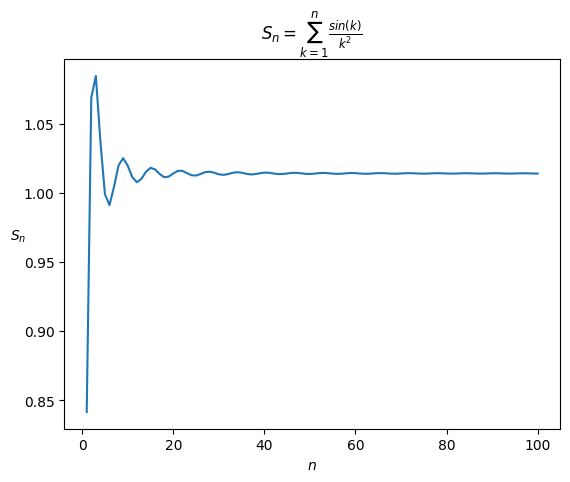

In [18]:
# %load ../solutions/ex5.py
import math
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
np.set_printoptions(precision=5)


print(f"Exercise 5::")
print(f"  5.1:")
x = np.arange(1,7)
print(f"  x:\n{x}\n")
print(f"    Solution 1:")
y = np.power(3,x)
print(f"  y:\n{y}\n")

print(f"    Solution 2:")
y = 3**x
print(f"  y:\n{y}\n")


print(f"  5.2:")
rng = rnd.default_rng()
A = rng.random((5,10))
print(f"  A:\n{A}\n")

max_val = A.max()
print(f"  Max val for all of A:\n{max_val}\n")

min_val_eachcol = A.min(axis=0) 
print(f"  Min. val in each column:\n{min_val_eachcol}\n")

min_val_fourthrow = A[3,:].min()
print(f"  Min. val in fourth row:\n{min_val_fourthrow}\n")

bool_mat = (A < 0.02) | (A > 0.98)
print(f"  Boolean Matrix:\n{bool_mat}\n".format(bool_mat))
print(f"  Any val <0.02 or >0.98? {bool_mat.any()}\n")
print(f"  Corresponding values:\n{A[bool_mat]}\n")


print(f"  5.3:")
def calc_sn(n):
    """
    Function which returns an array of 
    partial sums 
    """
    k = np.arange(1,n+1)
    nom = np.sin(k)
    denom = k**2
    return np.cumsum(nom/denom)

N = 100
k = np.arange(1,N+1)
Sk = calc_sn(N)
plt.xlabel(r"$n$")
plt.ylabel(r"$S_n$",rotation=0)
plt.title(r"$ S_n = \sum_{k=1}^n \frac{sin(k)}{k^2} $")
plt.plot(k,Sk);
